In [1]:
# Gregory Urman
# Regis University
# MSDS Optimal Decision Making
# Assignment 1
# 06-27-18

                                                     # Multi-Armed Bandit

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Bandit:
    def __init__(self, m):
        self.m = m
        self.mean = 0
        self.N = 0
        self.s2 = 0        
    

    def pull(self):
        return np.random.randn() + self.m

    def update(self, x):
        self.N += 1
        if(self.N > 1):
            self.s2 = ((self.N - 2)/ (self.N -1)) * self.s2 + (x - self.mean) * (x -self.mean) / self.N
        self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x
    

In [5]:
def run_experiment(m1, m2, m3, eps, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

    data = np.empty(N)
    mean1 = np.empty(N)    # my current estimate of the mean for the 1st Bandit
    mean2 = np.empty(N)     
    mean3 = np.empty(N)
    mean4 = np.empty(N)
    var1 = np.empty(N)      
    var2 = np.empty(N)
    var3 = np.empty(N)
    
    
    for i in range(N):      # the algorithm itself, random distributions
    # epsilon greedy
        p = np.random.random()
        if p < eps:     # if p is less than epsilon, 45% of the time p will be less than epsilon if eps 0.45 or 45% 
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
    
    # how do you know if epsilon is exploring? the number in random.choice
    
    # what does np.argmax do? it is picking the maximum argument, 
    # it takes into account each moving mean of the bandits and is picking the highest one
    # it is the Exploit part of the problem
    
    # Explore = Epsilon value
    
    # Exploit = 1 - Epsilon value    
        
    # for the plot
        data[i] = x
        mean1[i] = bandits[0].mean
        mean2[i] = bandits[1].mean
        mean3[i] = bandits[2].mean
        var1[i] = bandits[0].s2
        var2[i] = bandits[1].s2
        var3[i] = bandits[2].s2
    
    
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.mean)    # this is the self.mean

    variable = [cumulative_average, mean1, mean2, mean3, var1, var2, var3]    
    
    return variable


In [6]:
np.random.random()      # testing the output of the Random Numbers function

0.02621173967033219

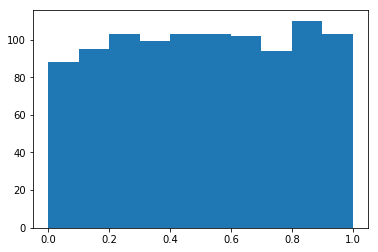

In [7]:
plt.hist(np.random.random(1000))
plt.show()

# down below: values go between 0 and 1.0, uniform distribution. 
    # how do I tell how many total? 100 Y-values for mean * 10 different bins 

    # not much range here

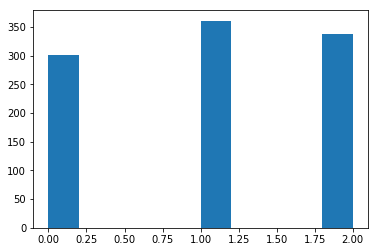

In [8]:
plt.hist(np.random.choice(3, 1000))
plt.show()

# this is very discreet. it only picks 0.00 or 1.00 or 2.00
# the algorithm is now picking a random bandit 1000 times

In [15]:
# In the cells below, I have run experiments marked as "1st Try," and "2nd Try," and "3rd Try."

    # For each Try, the means are defined and are described as "original means," and "means further apart," 
    # and "means closer together"
    # For example, the mean values for "1st try" are = 1.0, 2.0, and 3.0

    
# THE BANDITS THEMSELVES ARE NOT DIRECTLY DEFINED, I will refer to them as "the Bandit with the mean of 2.0", for example.

# anytime the code says something like "c_1 = run_experiment( ... )" it is referring to one of the Agents being tested.


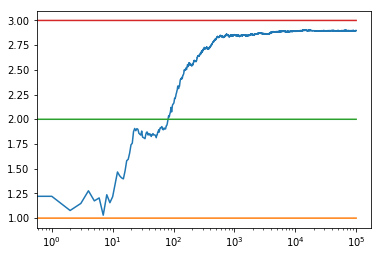

0.9905045396505089
1.9907895848883568
2.9984717688949583


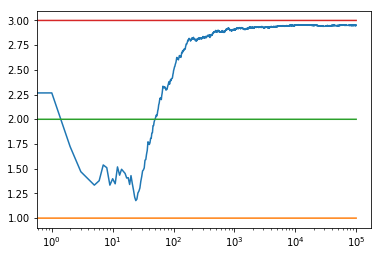

1.010037757438922
1.9908445202242122
3.0005566650947992


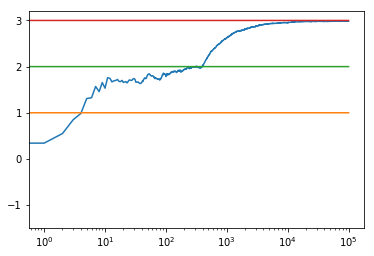

0.9468122328142974
2.0220068278954515
2.9984319993096107


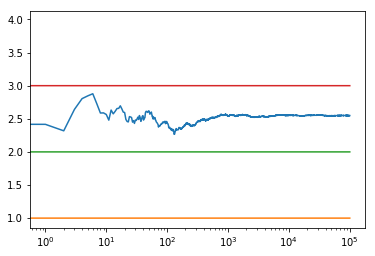

0.9921723602897025
2.0086688839228453
2.9967928032253317


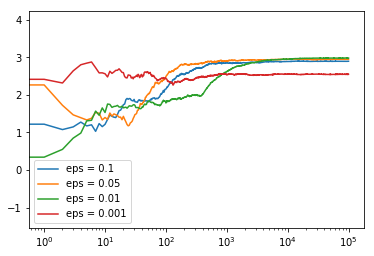

In [9]:
#### I could have chosen any number of Agents to see if they would converge towards one of the bandits ####
                #### in this case, I have made Four Agents, see below: ####


# Running the Bandits

                                            # 1st Try, original means


if __name__ == '__main__':
    
    c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000) # 10% epsilon, 
        # 1.0, 2.0, 3.0, then 2.0 = mean, 0.1 = epsilon value AKA 10% epsilon, 100000 = epochs for each agent. 
    c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000) # 5% epsilon
    c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000) # 1% epsilon
    c_001 = run_experiment(1.0, 2.0, 3.0, 0.45, 100000) # 45 % epsilon
    

# meaning: 
    # I'm comparing 4 different Agents, all distributions are normally distributed,
    # standard deviations for each Bandit cross at the other Bandit's means, 
    # let's say we pulled Bandit 2 first --> we will most likely get a value between 1 and 3 but it could be larger
    # then you pull Bandit 1 
    # then you pull Bandit 3 
    

    # how do you understand each distribution? Explore vs. Exploit the output data.
        # explore = higher epsilon, exploit = lower epsilon 
        # (eps = 0.0001 means 0.01% of the time we choose random bandit to explore)
            # epsilon = 0.5 means 50% of the time, we explore bandit and 50% we exploit highest moving mean
    
  # log scale plot
    plt.plot(c_1[0], label='eps = 0.1')
    plt.plot(c_05[0], label='eps = 0.05')
    plt.plot(c_01[0], label='eps = 0.01')
    plt.plot(c_001[0], label = 'eps = 0.001')
    plt.legend()
    plt.xscale('log')
    plt.show()
    

In [10]:
    # how did we generate the Y-axis of 0 thru 4 ?
        # mean
    # how did we generate the X-axis of 10^0 thru 10^5 ?
        # number of epochs

# experiment 1 meaning = for 'eps = 0.1', Agent explores 10% and exploit 90% of the time


# the last graph is all the experiment graphed together
# the epsilon value, with each experiment, it takes longer and longer to converge on the highest mean
    # if it's learning only 0.01% of the time about the other bandits, 
    # the probability is pushing you towards the same bandit
    # it's better to explore more in the beginning to learn in general 
    # THEN take chance on the bandit/slot machine that gives you the best results

# if we exlore 0.45 or 45% of the time, we are exploring too much

In [ ]:
# In the case of the graph above for 1st try, Agents with eps = 0.1, eps = 0.05, eps = 0.01 
# are all converging towards the Bandit with the mean of approximately 2.8

# The Agent with eps = 0.001 (RED LINE) is NOT CONVERGING to the same mean, perhaps it needs more than 10^5 iterations to run? 
# I am not able to interpret the data for eps = 0.001 any further at this time. 

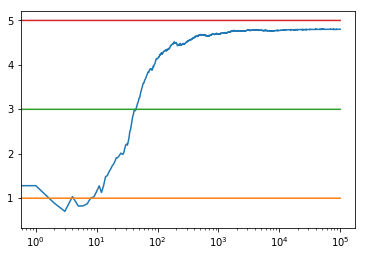

0.9890224548516443
2.985285417583395
5.000554836601589


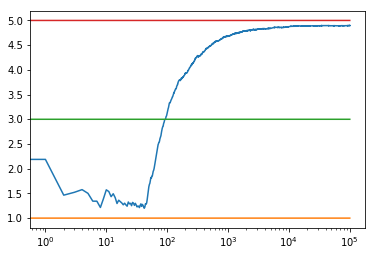

1.0049629435537566
2.9831415998836484
4.999470752912642


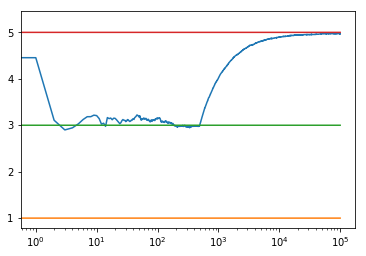

1.0504383093482341
3.027040437885385
5.000651621576109


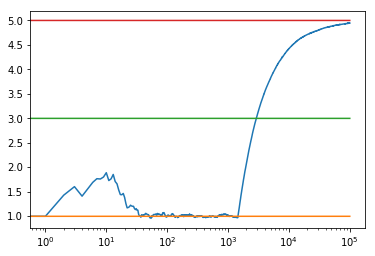

0.9687024051703267
3.2172323673236494
5.0070223710476185


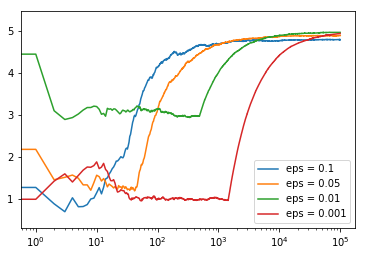

In [11]:

                                        # 2nd Try:     means further apart

if __name__ == '__main__':
    
    c_1 = run_experiment(1.0, 3.0, 5.0, 0.1, 100000) # 1.0, 3.0, 5.0, = mean,  0.1 = epsilon values, 100000 = epochs
    c_05 = run_experiment(1.0, 3.0, 5.0, 0.05, 100000) 
    c_01 = run_experiment(1.0, 3.0, 5.0, 0.01, 100000)  
    c_001 = run_experiment(1.0, 3.0, 5.0, 0.001, 100000)

    # log scale plot
    plt.plot(c_1[0], label='eps = 0.1')
    plt.plot(c_05[0], label='eps = 0.05')
    plt.plot(c_01[0], label='eps = 0.01')
    plt.plot(c_001[0], label = 'eps = 0.001')
    plt.legend()
    plt.xscale('log')
    plt.show()

# red line in the last graph takes the longest to converge (the furthest on the X-axis)

In [ ]:
# In the case of the graph above for 2nd Try, all Agents are converging towards the Bandit with the mean of 5
# The Agent with eps = 0.001 is taking the longest amount of time to converge

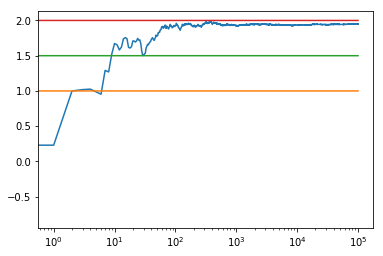

0.9983845133190496
1.506645666128729
1.9994620070992657


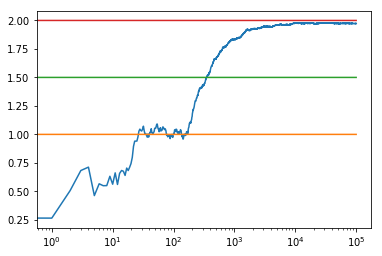

0.9885254981708452
1.4723331736808642
2.0003899915838312


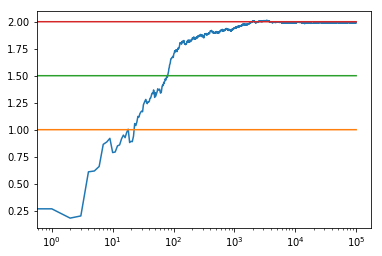

1.0450660581129734
1.4353943320835532
1.9952535992210236


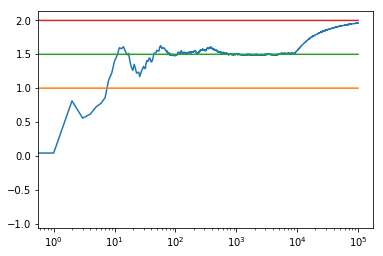

0.9233866218778868
1.515174089025915
2.0062768859877047


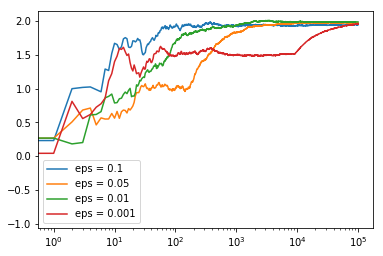

In [12]:

                                            # Try 3: means closer together

if __name__ == '__main__':
    
    c_1 = run_experiment(1.0, 1.5, 2.0, 0.1, 100000) # 1.0, 1.5, 2.0, = mean,  0.1 = epsilon values, 100000 = epochs
    c_05 = run_experiment(1.0, 1.5, 2.0, 0.05, 100000) 
    c_01 = run_experiment(1.0, 1.5, 2.0, 0.01, 100000)  
    c_001 = run_experiment(1.0, 1.5, 2.0, 0.001, 100000)

    # log scale plot
    plt.plot(c_1[0], label='eps = 0.1')
    plt.plot(c_05[0], label='eps = 0.05')
    plt.plot(c_01[0], label='eps = 0.01')
    plt.plot(c_001[0], label = 'eps = 0.001')
    plt.legend()
    plt.xscale('log')
    plt.show()

# Red line in the last graph takes the longest to converge (the furthest on the X-axis)

In [13]:
                                        # CONCLUSION IN WORDS: 

    
# Ideally, each Agent should Explore more in the beginning, then Explore less later on and Exploit more.
# By doing so, each Agent will maximize it's potential rewards. 
    

# WHY are there 4 agents instead of 3?       we just created 4 agents as an experiment

# In Try 3, all 4 agents are CONVERGING TOWARD THE BANDIT WITH THE MEAN OF 2   

# the eps = 0.0001 (RED LINE) is being presumptuous and over-exploiting, 
    # It's taking the longest to converge and being the least optimal. 
    # It is too greedy. 0.1 % of the time it is exploring the other agents. 
    # The rest 99.9 % of the time, it's trying to exploit as much as possible
        # In doing so, it is missing opportunities of getting more accurate data comparing to the other bandits. 
    
    
# THEREFORE: In the case of Try 3, the Bandit with the Mean of 2 is the Best 

In [14]:
                                                # THE END